In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
fileName="SUSY/SUSY.csv"
path = os.path.realpath(os.curdir)
fileNameFullPath = os.path.join(path, fileName)
df = pd.read_csv(fileNameFullPath, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


In [2]:
print(df.values.shape)

(5000000, 19)


In [3]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64')

                  0
count  5.000000e+06
mean   4.575654e-01
std    4.981961e-01
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    1.000000e+00
max    1.000000e+00


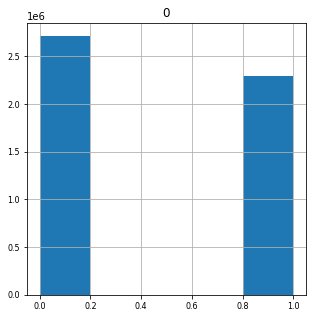

In [4]:
print(df[df.columns[0:1]].describe())
df[df.columns[0:1]].hist(figsize=(5, 5), bins=5, xlabelsize=8, ylabelsize=8);

                 1             2             3             4             5   \
count  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06   
mean   1.000318e+00  2.192580e-05 -4.994657e-05  9.994304e-01 -3.713140e-05   
std    6.873341e-01  1.003107e+00  1.001670e+00  6.542200e-01  1.002839e+00   
min    2.548815e-01 -2.102927e+00 -1.734789e+00  4.285860e-01 -2.059306e+00   
25%    5.624837e-01 -7.573512e-01 -8.673567e-01  5.969881e-01 -7.695916e-01   
50%    7.915511e-01  1.342127e-04 -3.880155e-04  7.997993e-01 -3.793710e-04   
75%    1.204413e+00  7.576486e-01  8.670981e-01  1.162353e+00  7.692296e-01   
max    2.055345e+01  2.101605e+00  1.734839e+00  3.303562e+01  2.059721e+00   

                 6             7             8             9             10  \
count  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06   
mean  -1.972243e-05  9.999744e-01  3.542352e-05  1.001437e+00 -4.878472e-05   
std    1.001631e+00  8.728877e-01  1.001654e+00  8.

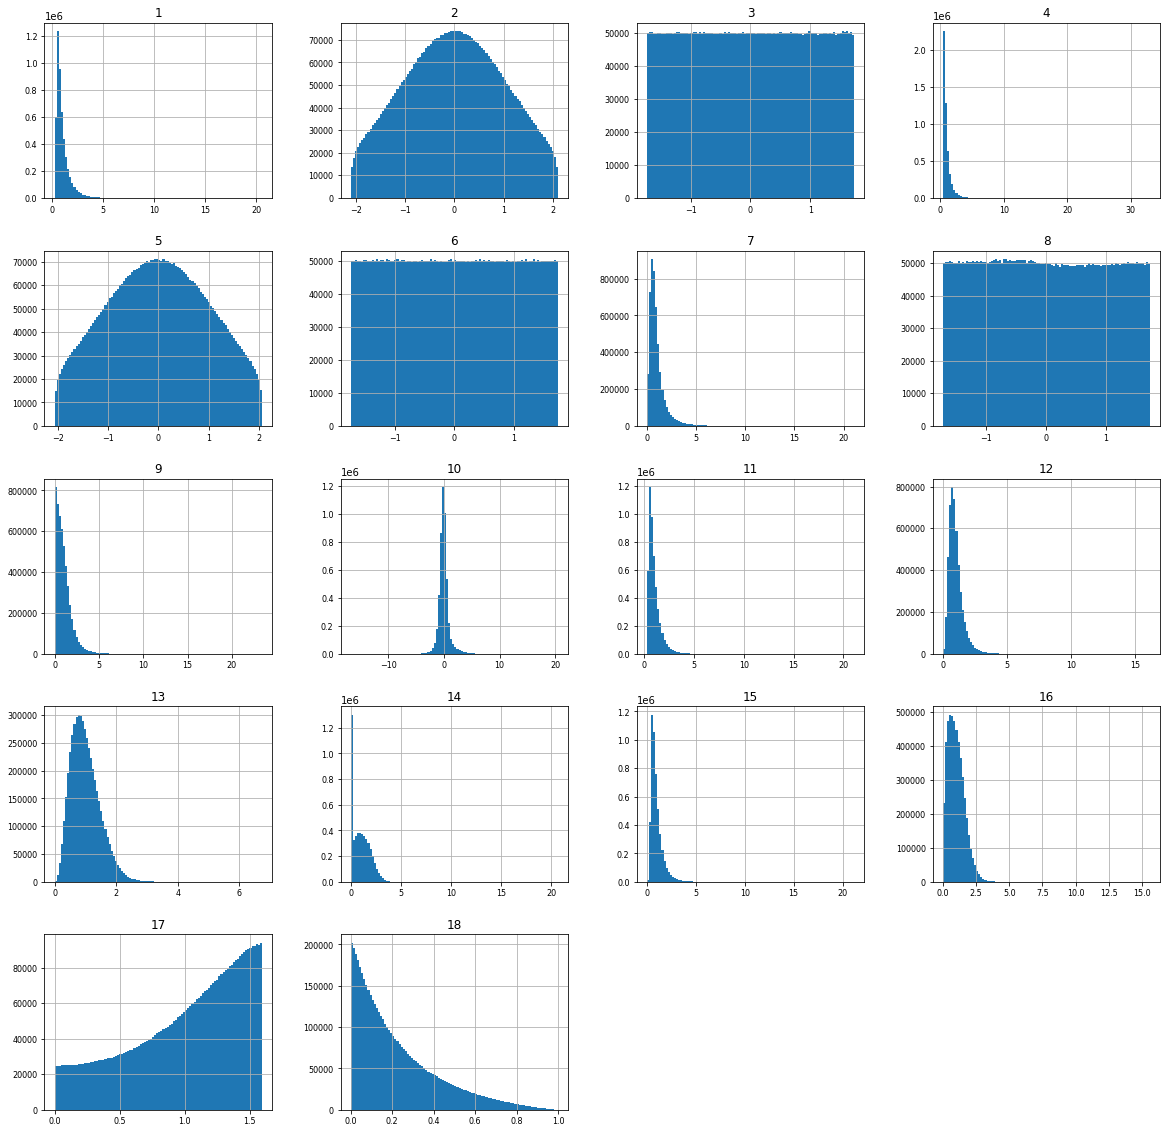

In [4]:
print(df[df.columns[1:19]].describe())
df[df.columns[1:19]].hist(figsize=(20, 20), bins=100, xlabelsize=8, ylabelsize=8);

                  3             6             8
count  5.000000e+06  5.000000e+06  5.000000e+06
mean  -4.994657e-05 -1.972243e-05  3.542352e-05
std    1.001670e+00  1.001631e+00  1.001654e+00
min   -1.734789e+00 -1.734202e+00 -1.727117e+00
25%   -8.673567e-01 -8.683741e-01 -8.661510e-01
50%   -3.880155e-04  2.006134e-04 -9.172642e-03
75%    8.670981e-01  8.674778e-01  8.687620e-01
max    1.734839e+00  1.734686e+00  1.740689e+00


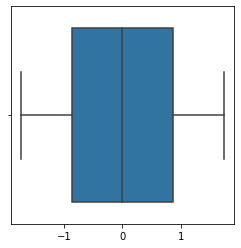

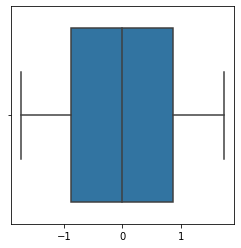

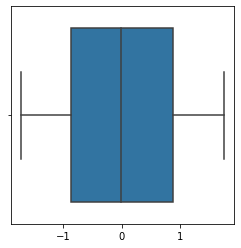

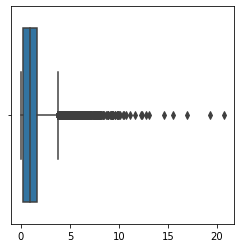

In [5]:
print(df[[3,6,8]].describe())
for i in [3,6,8, 14]:
  plt.figure(figsize=(4,4))
  sns.boxplot(df[[i]].to_numpy(), orient='h')

In [4]:
df_corr = df.corr()

In [5]:
print(df_corr)

          0         1         2         3         4         5         6   \
0   1.000000  0.387397 -0.000328 -0.000462  0.194794  0.000380 -0.000099   
1   0.387397  1.000000 -0.000381 -0.000333  0.684700 -0.000439  0.000330   
2  -0.000328 -0.000381  1.000000  0.000320 -0.000576  0.403475  0.000296   
3  -0.000462 -0.000333  0.000320  1.000000 -0.000196  0.000638 -0.267247   
4   0.194794  0.684700 -0.000576 -0.000196  1.000000 -0.000692  0.000175   
5   0.000380 -0.000439  0.403475  0.000638 -0.000692  1.000000 -0.000064   
6  -0.000099  0.000330  0.000296 -0.267247  0.000175 -0.000064  1.000000   
7   0.438821  0.384940 -0.000637  0.001373  0.139572  0.000058  0.000005   
8   0.000110 -0.000982 -0.000538 -0.183573 -0.002118 -0.000125 -0.034355   
9   0.282778  0.161098 -0.000556  0.001715 -0.003879  0.000145  0.000240   
10  0.077078 -0.018174 -0.000495 -0.001958  0.075996 -0.000169 -0.000091   
11  0.266589  0.851602 -0.000488 -0.000317  0.797551 -0.000870  0.000455   
12  0.423030

<AxesSubplot:>

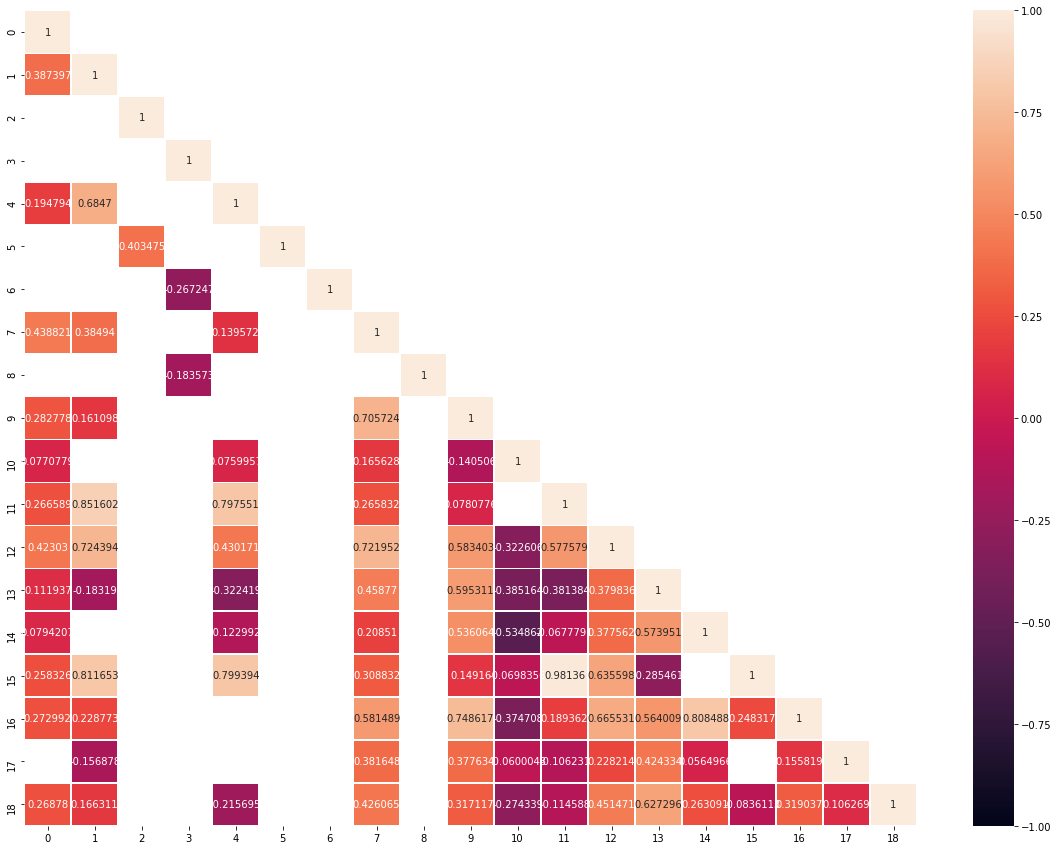

In [14]:
plt.subplots(figsize=(20,15))
maskMat = np.zeros_like(df_corr)
for i in range(len(maskMat)):
    for j in range(i+1, len(maskMat[0])):
        maskMat[i][j] = True
sns.heatmap(df_corr[(df_corr >= 0.05x) | (df_corr <= -0.05)],annot=True, mask=maskMat,vmax=1.0, vmin=-1.0,linewidths=.5,fmt='g')